## Visualize

### 1. function to get_data_from_db

In [1]:
import mysql.connector
import os
from dotenv import load_dotenv
from mysql.connector import Error

import pandas as pd

In [ ]:
def get_data_from_db(table_name, columns = '*'):
    
    # dot env
    load_dotenv()
    aws_db_ufo_pw = os.getenv('aws_db_ufo_pw')
    aws_host_ufo = os.getenv('aws_host_ufo')

    remote = mysql.connector.connect(
        host = aws_host_ufo,
        user = 'EDA',
        port = 3306,  # default 는 3306
        password = aws_db_ufo_pw,
        database = 'Frisbee'

        )
        
    

    cursor = remote.cursor(dictionary = True)
    
    
    query = f"""
        SELECT {columns} FROM {table_name}"""
    
    cursor.execute(query)
    
    results = cursor.fetchall()
    
    
    column_name = [des[0] for des in cursor.description]
    
    cursor.close()
    
    df = pd.DataFrame.from_records(results, index = column_name[0])
    
    
    return df
    

In [ ]:
if __name__ == '__main__':
    df = get_data_from_db('metheo')
    

In [16]:
df

,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow
id,,,,,,,,,,,,,,,
1,1995-06-08,0 days 02:00:00,"Trafalgar, IN",IN,39,-86,267,-13,0,0,0,1,0,0,0
2,1995-06-20,0 days 17:00:00,"Munhall, PA",PA,40,-79,329,-13,0,1,0,0,0,1,0
3,1995-07-04,0 days 21:30:00,"Myrtle, MS",MS,34,-89,108,-19,0,1,0,0,0,1,1
4,1995-08-01,0 days 16:00:00,"Pottstown, PA",PA,40,-75,46,-16,0,1,0,0,0,0,0
5,1995-12-15,0 days 06:50:00,"Eagan, MN",MN,44,-93,257,-15,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,2014-12-31,0 days 02:08:00,"Depoe Bay, OR",OR,44,-124,12,-6,1,0,0,0,0,0,0
7491,2014-12-31,0 days 22:20:00,", OH",OH,39,-83,309,-11,0,0,0,0,0,0,1
7492,2014-12-31,0 days 22:40:00,", NY",NY,40,-73,28,-14,0,0,0,0,0,1,0


In [ ]:
df_

### Metheo data visualize

In [47]:
df['-magnitude'] = df['magnitude']*-1

In [37]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Bright6
from bokeh.plotting import figure, show

In [ ]:
# address 열에서 state 데이터 추출이 어려운 데이터 확인

state_col= []
for add in df['address']:
    add_splitted = add.split(', ')[-1]
    
    if len(add_splitted) != 2:
        print(add,'    ' ,add_splitted)

Harrison charter Township      Harrison charter Township
-      -
Kailua-Kona      Kailua-Kona
Jasper      Jasper
-      -
-      -
-      -
-      -
-      -
-      -
-      -
Ephrata      Ephrata
-      -
Little Egg Harbor Townshi      Little Egg Harbor Townshi
-      -
New Wilmington      New Wilmington
Templeton      Templeton
Woodbury Heights      Woodbury Heights
Alamosa      Alamosa
-      -
-      -
Berlin Charter Township,      Berlin Charter Township,
Trezevant      Trezevant
Duck River      Duck River
Mequon      Mequon
Milwaukee      Milwaukee
Chalmette      Chalmette
Appleton      Appleton
North Ridgeville      North Ridgeville
-      -
Shrewsbury      Shrewsbury
Dunbar      Dunbar
Silver Lake State Park, M      M
-      -
-      -
Charter Township of Clint      Charter Township of Clint
Oakland Charter Township,      Oakland Charter Township,
-      -
Meridian Charter Township      Meridian Charter Township
Douglassville      Douglassville
Lincoln      Lincoln
-      -
- 

In [140]:
df_cleaned = df[df['state'].str.len() == 2]
df_cleaned

,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow,-magnitude
id,,,,,,,,,,,,,,,,
1,1995-06-08,0 days 02:00:00,"Trafalgar, IN",IN,39,-86,267,-13,0,0,0,1,0,0,0,13
2,1995-06-20,0 days 17:00:00,"Munhall, PA",PA,40,-79,329,-13,0,1,0,0,0,1,0,13
3,1995-07-04,0 days 21:30:00,"Myrtle, MS",MS,34,-89,108,-19,0,1,0,0,0,1,1,19
4,1995-08-01,0 days 16:00:00,"Pottstown, PA",PA,40,-75,46,-16,0,1,0,0,0,0,0,16
5,1995-12-15,0 days 06:50:00,"Eagan, MN",MN,44,-93,257,-15,1,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,2014-12-31,0 days 02:08:00,"Depoe Bay, OR",OR,44,-124,12,-6,1,0,0,0,0,0,0,6
7491,2014-12-31,0 days 22:20:00,", OH",OH,39,-83,309,-11,0,0,0,0,0,0,1,11
7492,2014-12-31,0 days 22:40:00,", NY",NY,40,-73,28,-14,0,0,0,0,0,1,0,14


In [148]:
df_state = df_cleaned.groupby(by = 'state').count().sort_values(by = 'date', ascending = False)
top_10_state_list = df_state.head(10).index

In [178]:

fig = px.scatter_map(
                df_cleaned,
                lat="latitude",
                lon="longitude",
                color='state',
                size='-magnitude',
                color_continuous_scale=px.colors.cyclical.IceFire,
                size_max=20,
                zoom=2.5,
                width=1200,  # <-- 그래프 전체 가로 크기
                height=1200
                )
fig.show()

### Top 10 state metheo frequency

In [149]:
top_10_state_list = df_state.head(10).index

In [152]:
df_cleaned_top10 = df_cleaned[df_cleaned['state'].isin(top_10_state_list)]

In [153]:
df_cleaned_top10

,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow,-magnitude
id,,,,,,,,,,,,,,,,
2,1995-06-20,0 days 17:00:00,"Munhall, PA",PA,40,-79,329,-13,0,1,0,0,0,1,0,13
4,1995-08-01,0 days 16:00:00,"Pottstown, PA",PA,40,-75,46,-16,0,1,0,0,0,0,0,16
6,1996-03-15,0 days 01:30:00,"Oceanside, CA",CA,33,-117,56,-26,0,0,0,1,0,0,1,26
7,1996-06-04,0 days 01:30:00,"Temple, TX",TX,31,-97,195,-14,0,0,0,0,0,1,1,14
9,1996-11-16,0 days 21:30:00,"Belchertown, MA",MA,42,-72,116,-27,0,0,0,0,0,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,2014-12-31,0 days 20:00:00,"Kings Mountain, NC",NC,35,-81,298,-24,1,1,0,0,0,1,1,24
7489,2014-12-31,0 days 20:00:00,"Winston-Salem, NC",NC,35,-80,264,0,0,0,1,0,0,0,0,0
7491,2014-12-31,0 days 22:20:00,", OH",OH,39,-83,309,-11,0,0,0,0,0,0,1,11


In [162]:
df_cleaned_gb= df_cleaned_top10.groupby(by = ['state', 'latitude', 'longitude']).mean(numeric_only=True)
df_cleaned_gb_indexes = df_cleaned_gb.index



In [170]:
index_dict = []
for idx, mag in zip(df_cleaned_gb_indexes, df_cleaned_gb['-magnitude']):
    index_dict.append({'state':idx[0], 'lat': idx[1], 'long' : idx[2], 'mag':mag })

In [177]:
fig = px.scatter_map(
                index_dict,
                lat="lat",
                lon="long",
                color='state',
                size='mag',
                color_continuous_scale=px.colors.cyclical.IceFire,
                size_max=50,
                zoom=2.5,
                width=1200,  # <-- 그래프 전체 가로 크기
                height=1200
                )
fig.show()

### Monthly Frequency

#### data preprocess

In [ ]:
df_ts = df.set_index('date')
df_month = df_ts.resample('MS')

In [80]:
df_month = df_ts.resample('MS')

In [103]:
df_month_cnt = df_month.count()
df_month_cnt = df_month_cnt.reset_index()

In [104]:
df_month_cnt

,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow,-magnitude
0,1995-06-01,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,1995-07-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1995-08-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1995-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1995-10-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,2014-08-01,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235
231,2014-09-01,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998
232,2014-10-01,839,839,839,839,839,839,839,839,839,839,839,839,839,839,839
233,2014-11-01,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139


In [93]:
df_month.count().index.to_list()

[Timestamp('1995-06-01 00:00:00'),
 Timestamp('1995-07-01 00:00:00'),
 Timestamp('1995-08-01 00:00:00'),
 Timestamp('1995-09-01 00:00:00'),
 Timestamp('1995-10-01 00:00:00'),
 Timestamp('1995-11-01 00:00:00'),
 Timestamp('1995-12-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('1996-02-01 00:00:00'),
 Timestamp('1996-03-01 00:00:00'),
 Timestamp('1996-04-01 00:00:00'),
 Timestamp('1996-05-01 00:00:00'),
 Timestamp('1996-06-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1996-08-01 00:00:00'),
 Timestamp('1996-09-01 00:00:00'),
 Timestamp('1996-10-01 00:00:00'),
 Timestamp('1996-11-01 00:00:00'),
 Timestamp('1996-12-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('1997-02-01 00:00:00'),
 Timestamp('1997-03-01 00:00:00'),
 Timestamp('1997-04-01 00:00:00'),
 Timestamp('1997-05-01 00:00:00'),
 Timestamp('1997-06-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('1997-08-01 00:00:00'),
 Timestamp('1997-09-01 00:00:00'),
 Timestamp('1997-10-

#### visualize

In [109]:
from bokeh.plotting import curdoc, figure, show
from bokeh.models import DatetimeTickFormatter

In [111]:
curdoc().theme = 'caliber'

p = figure(title='년도별 유성우 발생 빈도', width=1000, height=300)
p.line(df_month_cnt['date'],df_month_cnt['time'] )

p.xaxis.formatter = DatetimeTickFormatter(years="%Y")
show(p)

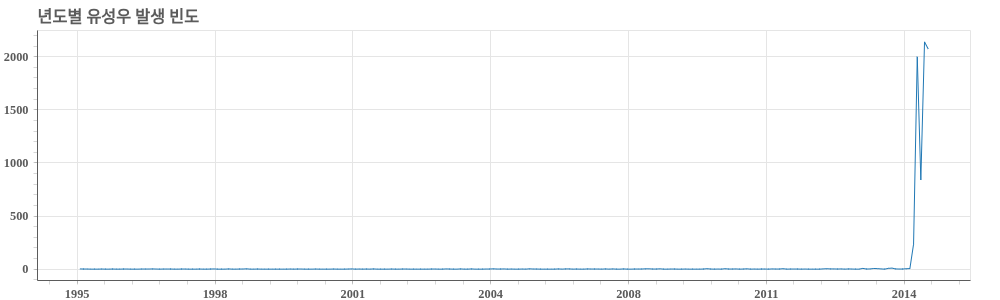